# 반복문
- 파이썬 코드실행 시각화 사이트: http://pythontutor.com/visualize.html

In [1]:
for i in range(10):
    if i ==5:
        break
    print(i)
else:
    print("T")

0
1
2
3
4


> 반복문에서 `else`는 반복문이 완벽하게 실행되었을 때만 실행된다.  
-> tensorflow 2.0부터는 epoch 돌리는 것이 for문으로 바뀌었다. 나중에 활용할 것이다.

In [3]:
for i in range(10):
    if i ==5:
        continue
    print(i)
else:
    print("T")

0
1
2
3
4
6
7
8
9
T


> 반복문에서 `continue`는 다음 루프로 넘어가라는 의미이다.   
위에서는 `i`가 5일때 continue를 만나서 5는 print되지 않고 다음 루프인 `i=6`으로 넘어갔다.

---

In [7]:
# non-sequence는 내부적으로는 순서가 있으나, 사용자가 직접 순서를 정할 수는 없다 ex) set
# dictionary는 python 3.6부터 sequence로 바뀌었다.

{4:1, 2:2, 3:3}

{4: 1, 2: 2, 3: 3}

---

# iterable
- 파이썬의 기본 데이터 개념 중에서 아주 중요함.
- 파이썬 함수형 프로그램의 첫번째 개념
- 내일 자세히 배울 예정

In [11]:
# 임의의 함수 x
# for문을 가지고 있다. 
# for문은 in 다음에 iterable이 올 수 있다.

def x():
    for i in range(10):
        print(i)
    else:
        print("T")

In [12]:
# Assembly
# GET_ITER, FOR_ITER가 있는 것 확인

import dis
dis.dis(x)

  2           0 SETUP_LOOP              32 (to 34)
              2 LOAD_GLOBAL              0 (range)
              4 LOAD_CONST               1 (10)
              6 CALL_FUNCTION            1
              8 GET_ITER
        >>   10 FOR_ITER                12 (to 24)
             12 STORE_FAST               0 (i)

  3          14 LOAD_GLOBAL              1 (print)
             16 LOAD_FAST                0 (i)
             18 CALL_FUNCTION            1
             20 POP_TOP
             22 JUMP_ABSOLUTE           10
        >>   24 POP_BLOCK

  5          26 LOAD_GLOBAL              1 (print)
             28 LOAD_CONST               2 ('T')
             30 CALL_FUNCTION            1
             32 POP_TOP
        >>   34 LOAD_CONST               0 (None)
             36 RETURN_VALUE


# while
`while`은 인덱스 베이스이기 때문에 객체지향 개념에는 어울리지 않는다.  
- 무한 루프를 걸 때 while을 사용한다.
    - 예: 사용자 입력을 대기할 때(실제 게임 등 서비스에서 많이 사용한다.)
- for문보다 넓은 개념이다.
    - while문으로 for문을 대체할 수 있다. 하지만 for문으로 while문은 대체할 수 없는 경우가 있다.

In [13]:
# for문을 while문으로 대체해서 쓸 수 있다.

i = 10
while True:
    print(i)
    i -= 1
    if i==0:
        break

10
9
8
7
6
5
4
3
2
1


In [14]:
# while과 else

i = 10
while i>10:
    print(i)
    i -= 1
else:
    print("T")

T


> `while`에서도 `else`는 완벽하게 반복문이 수행되었을 때 실행된다.  
위 코드에서 `i>10`이라는 조건이 `False`이기 때문에 while문이 완벽하게 실행되지 않았다고 생각하기 쉽다.  
그러나 컴퓨터는 '0번 완벽히 실행'했다고 받아들이기 때문에 `else`가 실행된다.

일부 파이썬 책에서는 반복문에 `else`를 쓰지 말고 try문을 쓰라는 경우가 종종 있다. 그러나 장단점이 있기 때문에 기호에 따라 사용해도 된다. 특히나, 딥러닝에서는 메모리 문제가 반복문과 밀접한 관계가 있기 때문에 `else`가 유용하게 사용된다.

# 반복문에서 유의할 점
- 반복문에서 사용된 이름은 반복문이 끝나도 값이 살아있다.
- python 3. 버전대부터 바뀐 기능

In [15]:
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [18]:
# x가 반복문의 마지막 값이 9이다.

x

9

> comprehension을 이용하면 이런 문제가 없다.  
- comprehension은 내일 자세히 배울 예정

In [19]:
t = [yy for yy in range(10)]

In [20]:
# Name Error

yy

NameError: name 'yy' is not defined

# EAFP
- 공식문서: https://docs.python.org/ko/3.7/glossary.html#term-eafp
- 허락보다는 용서를 구하기가 쉽다 (Easier to ask for forgiveness than permission). 이 흔히 볼 수 있는 파이썬 코딩 스타일은, 올바른 키나 어트리뷰트의 존재를 가정하고, 그 가정이 틀리면 예외를 잡습니다. 이 깔끔하고 빠른 스타일은 많은 try와 except 문의 존재로 특징지어집니다. 이 테크닉은 C와 같은 다른 많은 언어에서 자주 사용되는 LBYL 스타일과 대비됩니다.
  

- 선언할 때 에러를 체크하지 않고 실행할때 에러를 일으킨다.
- 파이썬은 에러를 좋아한다. 에러를 내고 디버깅하는 방법을 선호한다.



- 파이썬은 느린 문제가 있기 때문에 조금이라도 빠르게 하기 위해서 EAFP를 채택했다.
- complie 언어에서는 EAFP를 쓰지 않는다.
- script 언어는 언어마다 다르다.

# assert문
- `False`이면 에러를 강제로 발생시킨다.
- 특정 데이터 타입만 인자로 받는 함수를 만들 때 활용할 수 있다.

In [21]:
assert i > 11

AssertionError: 

# Raise문
- 강제로 에러를 발생시킨다.
- 에러를 상속받아서 커스텀 에러를 만들 수 있다.
- 내가 정한 에러가 발생하는 위치를 파악하는데 사용할 수 있다.
- 내가 정한 에러가 발생하면 특정 동작을 할 수 있도록 조치하는데 활용할 수 있다.

In [22]:
if i>9:
    raise Exception

Exception: 

# try문
- 예외처리문

In [29]:
# 에러가 있을 떄

try:
    a = 1/0
except:
    print("t")

t


> try문 내에서 에러가 나면 에러를 일으키는 대신에 except문이 실행된다.

In [30]:
# 에러가 없을 때

try:
    a = 0
except:
    print("t")

> 에러가 나지 않으면 except문이 실행되지 않는다.

In [26]:
# else

try:
    a = 0
except:
    print("t")
else:
    print("else")

else


> else는 try문에서 에러가 발생하지 않았을 때 실행된다.

In [27]:
# finally

try:
    a = 0
except:
    print("t")
else:
    print("else")
finally:
    print("finally")

else
finally


In [28]:
# finally

try:
    a = 1/0
except:
    print("t")
else:
    print("else")
finally:
    print("finally")

t
finally


> finally 는 try문에서 에러가 발생하거나 안하거나 상관없이 항상 실행된다.

In [34]:
try:
    a = 1/0
except ZeroDivisionError:
    print("t")

t


> `except` 뒤에 특정 에러를 지정하면 해당하는 에러만 처리한다.  
- 내가 custom Error를 만들어서 활용할 수 있다.

In [38]:
try:
    a = 1/0
except Exception:
    print(Exception)

<class 'Exception'>


> `Exception`은 모든 에러를 받는다. 
- 에러별로 `except`문을 여러개 쓰고 마지막에 지정되지 않은 에러를 종합 처리할때 쓸 수 있다.

In [40]:
try:
    a = 1/0
except Exception as e:
    print(e)

division by zero


# as
> - with 문에서: as는 assignment이다.  
- import 문에서: as는 이름이다.
- except 문에서: as는 인스턴스이다.

---

# python magic method

In [157]:
class X:
    '''test'''
    def __repr__(self):
        return "REPR"
    def __str__(self):
        return "STR"

In [63]:
?X

In [64]:
X.__doc__

'test'

> 선언할때 `'''  '''`은 docstring이다.  
우리가 shift + tab 해서 확인하는 그것이다.

In [158]:
x = X()
x

REPR

> `__repr__`은 객체 이름을 불렀을 때 표현해주는 값이다.

In [58]:
print(x)

STR


> `__str__`은 `print`했을때 표현해주는 값이다.  
- 대부분의 개발자들은 `__repr__`과 `__str__`을 똑같이 해놓는다. 그래서 객체를 불렀을때 읽기 힘들면 print를 해서 본다.
- 그러나 실제로는 객체를 불렀을 때 값과 프린트 값을 다르게 하는 것이 가능하다.


In [66]:
# ZeroDivisionError도 Exception을 상속받아서 만들었다.
# 우리도 Exception을 상속받아서 custom Error를 만들 수 있다.

issubclass(ZeroDivisionError, Exception)

True

> "is"라는 이름이 붙은 함수를 predicate 함수라고 한다.  
`True`, `False`를 반환한다. 

---

# 중첩식 할당

In [77]:
# 3항 표현식 

a = 3
t = 3 if a>2 else 4
t

3

> 할당문의 우변은 표현식이다.  
3항으로 표현식을 만들 수 있다.

In [79]:
a = 3
t = 3 if a>4 else 4 if a>2 else 5
t

4

> 식은 식을 포함할 수 있다. 중첩 식을 사용할 수 있다.
- 식은 할당문의 우변에 쓸 수 있고
- 식은 함수의 인자로 쓸 수 있다.

---

# 선언문
    - 나중에 재사용하기 위해서 정의하는 것이다.
    - 파이썬에서는 함수 선언문과 클래스 선언문이 있다.
    - 매개변수와 인자의 차이를 알아야한다.

In [80]:
# 함수 선언문

def x(a): # <-a는 매개변수(parameter) 라고 한다.
    return 1

In [81]:
x(2) # <- 2는 인자(argument) 라고 한다.

1

> - 매개변수(parmeter, 파라미터)는 선언할 때 부르는 이름이다.  
- 인자(argument)는 사용할때 부르는 이름이다.
- 기본적으로 매개변수와 인자의 개수는 같아야 한다. 

In [82]:
# 매개변수 기본값(default)

def x(a=2):
    return 1

In [83]:
# 키워드 인자

x(a=2)

1

In [84]:
# default 값이 있기 때문에 개수를 안 맞춰도 된다.

x()

1

> - 매개변수는 default 값을 둘 수 있다. 
- 인자를 매개변수=값 으로 전달하는 것을 키워드 방식이라고 한다.
- 매개변수와 인자의 `=`는 서로 다른 역할이다.
- 매개변수에 기본값이 주어지면 인자가 없으면 기본값을 인자로 사용한다.
    - tip: 파이썬은 overloading을 지원하지 않기 때문에 가능하다.

In [88]:
# 매개변수가 여러개일때, 한번 default 값을 쓰면 그 뒤로는 계속 default 값을 써줘야한다.

def x(a,b=3):
    return a

In [91]:
x(1,2)

1

In [90]:
# 키워드 방식은 입력 순서에 구애받지 않는다.

x(b=1, a=2)

2

> - 매개변수는 기본값을 써도 되고 안 써도 된다.
- 키워드 방식은 입력 순서를 섞어도 된다.

In [93]:
# Error

def x(a,b=3, c):
    return a

SyntaxError: non-default argument follows default argument (<ipython-input-93-b8f6bc837608>, line 3)

In [92]:
# Error

x(1, b=2, 3)

SyntaxError: positional argument follows keyword argument (<ipython-input-92-1c21313dd956>, line 1)

> - 한번 default 값을 쓰면 그 뒤로는 계속 defalut 값을 써줘야한다.
- 한번 키워드 방식을 쓰면 그 뒤로는 계속 키워드 방식을 써야한다.

In [94]:
def y(*, a):
    return a

In [97]:
y(1)

TypeError: y() takes 0 positional arguments but 1 was given

In [98]:
y(a=1)

1

> - 매개변수의 `*`는 사용할때 키워드 방식을 강제한다.
- Keyword only 방식이라고 한다.

In [99]:
def y(*a):
    return a

In [100]:
y()

()

In [101]:
y(1)

(1,)

In [102]:
y(1,2,3)

(1, 2, 3)

> 파라미터에 `*`를 붙이면 인자를 여러개 받을 수 있다.
- 가변 포지셔널 방식이라고 한다.

In [103]:
def y(**a):
    return a

In [104]:
y(a=1,b=2,c=3)

{'a': 1, 'b': 2, 'c': 3}

> - 파라미터에 `**`가 붙으면 키워드 인자를 여러개 받을 수 있다.
- 가변 키워드 방식이라고 한다.

In [107]:
def y(*a, **b):
    return a, b

In [108]:
y(3,2,1,a=1,b=4,c=8)

((3, 2, 1), {'a': 1, 'b': 4, 'c': 8})

> - 가변 포지셔널과 가변 키워드를 동시에 사용할 수 있다.
- 가변 포지셔널은 리턴이 튜플, 가변 키워드는 리턴이 딕셔너리로 나온다
- 단, 포지셔널과 키워드는 순서를 바꿀 수 없다.

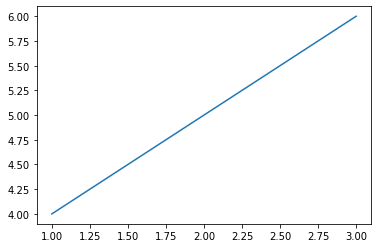

In [110]:
# shift + tab을 눌러서 Signature를 보고 어떻게 인자를 넣어야할지 생각해봅시다.
# docstring에서 Call Signature를 보면 [x]가 있는데, 이는 리스트라는 뜻이 아니라 옵션이라는 뜻이다.

import matplotlib.pyplot as plt
plt.plot([1,2,3],[4,5,6])

In [111]:
def x(*a):
    return a

In [112]:
x([1,2,3,4])

([1, 2, 3, 4],)

In [113]:
x(*[1,2,3,4])

(1, 2, 3, 4)

> - 인자에 `*`이 붙으면 unpacking이다.
- list를 하나의 객체로 받는 것이 아니라 풀어서 값을 하나씩 따로 받았다.

In [114]:
def x(**a):
    return a

In [115]:
t = {"a":3, "b":4, "c":5}

In [117]:
# Error
# 함수에서 parameter가 **이 붙으면 키워드 인자만 받기 때문이다.

x(t)

TypeError: x() takes 0 positional arguments but 1 was given

In [118]:
x(**t)

{'a': 3, 'b': 4, 'c': 5}

> - 딕셔너리를 인자로 전달할 때, `**`가 붙으면 딕셔너리의 키와 밸류를 키워드 형식으로 전달한다.
- 딕셔너리 언팩킹

In [124]:
def x(*a):
    return a

In [125]:
t = {"a":3, "b":4, "c":5}

In [126]:
x(*t)

('a', 'b', 'c')

> - 딕셔너리를 언팩킹할 때 `*`를 쓰면 key만 전달한다.

In [142]:
?sum

# Signature: sum(iterable, start=0, /)

> - Signature의 `/`는 positional 인자를 강제한다는 뜻이다.

#  파라미터의 7가지 (공식문서에는 5가지 사용법이 있지만 선생님은 더 세분화)
1. positional 방식
2. keyword 방식
7. default 값을 주는 방식
3. positional only 방식
4. keword only 방식
5. 가변 keyword 방식
6. 가변 positional 방식
  
(정확하는 기억이 나지 않음...)

In [133]:
def x(aa:int) -> int :
    return aa

In [134]:
?x # 또는 shift + tab

In [135]:
x(3)

3

In [136]:
x('hello')

'hello'

> - Signature를 보면 입력 데이터 타입과 출력 데이터 타입에 대한 설명이 된다.
- `def fn(param: input type) -> output type:`의 형태로 사용한다.
- 이것은 강제효과는 없기 때문에 무시해도 실행하는데는 지장이 없다.

# higher order function
다음 두가지를 동시에 만족하면 higher order function이라고 한다.
    1. argument를 funtion으로 쓸 수 있다.
    2. return을 function으로 쓸 수 있다.

In [137]:
# 함수를 인자로 받는 경우

def x(f): 
    f("문근영")

In [138]:
x(print)

문근영


> - 파이썬에서 `()`괄호를 붙일 수 있는 3가지 경우
    - 함수
    - 클래스
    - `__call__`이 정의된 인스턴스
- `callable`은 `()`를 쓸 수 있는 객체인지를 확인하는 함수이다.

> - 괄호가 안 붙은 것만 함수라고 한다. 헷갈리지 쉬움.
    - x -> 함수
    - x() -> 리턴값  

In [139]:
# 함수를 인자로 받아서 함수를 리턴하는 경우

def x(f):
    return f

In [140]:
x(print)("문근영")

문근영


# for를 쓰지 않는 방법
내부적으로 vectorization을 해서 속도가 for문보다 훨씬 빠르다.  
reduction한다.
1. map
2. filter
3. reduce

In [141]:
# map에서 함수를 인자로 받는 기능이 유용하다.
# map(func, *iterables) --> map object

?map

In [143]:
# 익명함수 lambda

list(map(lambda x:x+1, [2,3,4,5]))

[3, 4, 5, 6]

In [147]:
list(filter(lambda x:x>3, [2,3,4,5,6]))

[4, 5, 6]

In [144]:
from functools import reduce

In [145]:
reduce(lambda x,y:x+y, [1,2,3,4,5])

15

In [148]:
%%timeit
temp = []
for i in range(10000000):
    temp.append(i+1)

1.32 s ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
%%timeit
map(lambda x:x+1, range(10000000))

498 ns ± 20.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# first-class function
- 프로그래밍에서는 값이 제일 중요하다.
- 함수를 값처럼 쓸 수 있다.
- java는 higher order function이지만 first-class function은 아니기 때문에 파이썬과 차이가 있다.

In [150]:
x = print

In [151]:
x("문근영")

문근영


In [152]:
x = [print, sum]

In [153]:
x[0]("문근영")

문근영
